In [25]:
import os
import zipfile
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

DATA_DIR = "data"

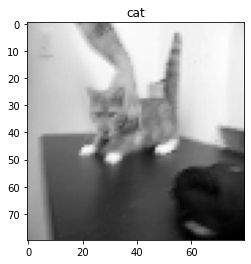

In [26]:
# test to see if dataset can load and properly configured
category = p.split(".")[0]
img_array = cv2.imread(os.path.join(DATA_DIR,p),cv2.IMREAD_GRAYSCALE)
new_img_array = cv2.resize(img_array, dsize=(80, 80))
plt.imshow(new_img_array,cmap="gray")
plt.title(category)
plt.show()

In [27]:
def create_test_data(path):
    X = []
    y = []
    convert = lambda category : int(category == 'dog')
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)
    return X, y

In [28]:
# load data X and labels y
X, y = create_test_data(DATA_DIR)
X = np.array(X).reshape(-1, 80,80,1)
X = X/255.0 # normalize
y = np.array(y)

In [29]:
# define model
model = Sequential()

# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))

# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
# fit
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 47s 71ms/step - loss: 0.6194 - accuracy: 0.6506 - val_loss: 0.8512 - val_accuracy: 0.4472
Epoch 2/10
625/625 [==============================] - 44s 71ms/step - loss: 0.5242 - accuracy: 0.7409 - val_loss: 0.9511 - val_accuracy: 0.4414
Epoch 3/10
625/625 [==============================] - 45s 71ms/step - loss: 0.4629 - accuracy: 0.7807 - val_loss: 0.3549 - val_accuracy: 0.8664
Epoch 4/10
625/625 [==============================] - 45s 71ms/step - loss: 0.4248 - accuracy: 0.8011 - val_loss: 0.4614 - val_accuracy: 0.7962
Epoch 5/10
625/625 [==============================] - 27s 44ms/step - loss: 0.3882 - accuracy: 0.8219 - val_loss: 0.7353 - val_accuracy: 0.6392
Epoch 6/10
625/625 [==============================] - 35s 56ms/step - loss: 0.3410 - accuracy: 0.8482 - val_loss: 0.8535 - val_accuracy: 0.6274
Epoch 7/10
625/625 [==============================] - 38s 61ms/step - loss: 0.3002 - accuracy: 0.8706 - val_loss: 0.8561 - val_accuracy: